# Business Analytics

#### Project description
* For the analytical department at Yandex.Afisha website for shows, concerts, theater ext.
There is a need to help optimize marketing expenses.
    * We have:
        * Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
        * Dump file with all orders for the period
        * Marketing expenses statistics
        
    * We are going to study:
        * How people use the product
        * When they start to buy
        * How much money each customer brings
        * When they pay off

* [1. Download the data and prepare it for analysis](#Download-the-data-and-prepare-it-for-analysis)
    * [Description of visits table](#Description-of--visits-table:)
    * [Description of orders table](#Description-of-orders-table:)
    * [Description of costs table](#Description-of-costs-table:)
* [2.Make a reports and calculate metrics](#Step-2.-Make-reports-and-calculate-metrics:)
    *  [2.1 Product](#product:)
        * [2.1.1. visits by year](#visits-by-year:)
        * [2.1.2. visits by month](#visits-by-month:)
        * [2.1.3. visits by week](#visits-by-week)
        * [2.1.4. visits by day](#visits-by-day:)
        * [2.1.5. sticky factors](#sticky-factors:)
        * [2.1.6. session-length](#session-length:)
        * [Retention](#Retention:)
    *  [2.2 Sales](#Sales)
        * [2.2.1. Average purchase size](#Average-purchase-size)
        * [2.2.2. LTV](#LTV:)
    *  [2.3 Marketing](#Marketing:)
        * [2.3.1. CAC by sourse](#CAC-by-source:)
        * [2.3.2. CAC by month](#CAC-by-month:)
        * [2.3.3. CAC by month and source](#CAC-by-month-and-source:)
        * [2.3.4 Return of investment (ROMI)](#Return-of--investment-(ROMI):)
* [Genral coclution](#Conclutions:)

## Download the data and prepare it for analysis

In [84]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pandas_profiling import ProfileReport


In [85]:
import warnings
warnings.filterwarnings('ignore')

##### Description of  visits table:
* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
    * Uid — user's unique identifier
    * Device — user's device
    * Start Ts — session start date and time
    * End Ts — session end date and time
    * Source Id — identifier of the ad source the user came from
 *  All dates in this table are in YYYY-MM-DD format.

In [86]:
# Load 'visits_log_us.csv' data:
try:
    visits = pd.read_csv('/datasets/visits_log_us.csv',
                        dtype={'Device': 'category'},
                        parse_dates=['Start Ts', 'End Ts'])
except:
     visits = pd.read_csv('visits_log_us.csv',
                         dtype={'Device': 'category'},
                         parse_dates=['Start Ts', 'End Ts'])
visits.info()
visits.head()
visits.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


,Device,End Ts,Source Id,Start Ts,Uid
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


In [87]:
visits.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Device,359400,2,desktop,262567,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
End Ts,359400,224760,2017-11-24 16:51:00,23,2017-06-01 00:02:00,2018-06-01 01:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source Id,359400.0,NaN,NaN,NaN,NaT,NaT,3.750515,1.917116,1.0,3.0,4.0,5.0,10.0
Start Ts,359400,224303,2017-11-24 16:06:00,19,2017-06-01 00:01:00,2018-05-31 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Uid,359400.0,NaN,NaN,NaN,NaT,NaT,9202556994354921472.0,5298432824659611648.0,11863502262781.0,4613406732167550976.0,9227412908740601856.0,13728237011236171776.0,18446676030785673216.0


In [88]:
# profile = ProfileReport(visits)
# display(profile)

* visits table contains 359,400 rows: 
     dates between the range: 01/06/2017 - 31/05/2018, there are 224,303 distinct start dates and 224,760 end dates.
* By Profile report: 
     visit table has no duplicates, no zeros, and no missing cells. 

##### Description of orders table:
* Dump file with all orders for the period
    * Uid — unique identifier of the user making an order
    * Buy Ts — order date and time
    * Revenue — Yandex.Afisha's revenue from the order

In [89]:
# Load 'orders_log_us.csv' data:
try:
    orders = pd.read_csv('/datasets/orders_log_us.csv',
                         parse_dates=['Buy Ts'])
except:
     orders = pd.read_csv('orders_log_us.csv',
                          parse_dates=['Buy Ts'])
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [90]:
orders.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Buy Ts,50415,45991,2018-05-31 10:13:00,9,2017-06-01 00:10:00,2018-06-01 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,50415.0,NaN,NaT,NaN,NaT,NaT,4.999647,21.818359,0.0,1.22,2.5,4.89,2633.28
Uid,50415.0,NaN,NaT,NaN,NaT,NaT,9098160634289729536.0,5285741550834715648.0,313578113262317.0,4533566627250599936.0,9102273602618561536.0,13682901980465401856.0,18446167067214817280.0


In [91]:
# profile = ProfileReport(orders)
# display(profile)

* orders table contain 50415 rows,  
     dates between range: 01/06/2017 - 31/05/2018, there 45,991 distinct Buy dates.
* By Profile report: 
     orders table has no duplicates, no zeros, and no missing cells. 
     the Revenue contains values ranging between 0 - 2633.28

##### Description of costs table:
*  Marketing expenses statistics
    * source_id — ad source identifier
    * dt — date
    * costs — expenses on this ad source on this day

In [92]:
# Load 'costs_us.csv' data:
try:
    costs = pd.read_csv('/datasets/costs_us.csv',
                         parse_dates=['dt'])
except:
     costs = pd.read_csv('costs_us.csv',
                          parse_dates=['dt'])
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [93]:
costs.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
source_id,2542.0,NaN,NaT,NaN,NaT,NaT,4.857199,3.181581,1.0,2.0,4.0,9.0,10.0
dt,2542,364,2017-06-01,7,2017-06-01,2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costs,2542.0,NaN,NaT,NaN,NaT,NaT,129.477427,156.296628,0.54,21.945,77.295,170.065,1788.28


In [94]:
# profile = ProfileReport(costs)
# display(profile)

* orders table contains 2542 
     dates between range: 01/06/2017 - 31/05/2018, there's 364 distinct costs dates.
* By Profile report: 
     orders table has no duplicates, no zeros, and no missing cells. 
     The Revenue contains values ranging between 0.54 - 1788.28

## Step 2. Make reports and calculate metrics:

### product:

#### visits by year: 

   year  touch_visits  desktop_visits
0  2017         39118           96303
1  2018         35625           79623


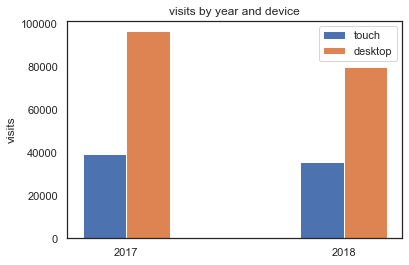

In [95]:
# group visits by year and plot it in graph:
visits['year'] = pd.DatetimeIndex(visits['Start Ts']).year
visits_by_year_touch = visits.query('Device == "touch"').groupby('year')['Uid'].nunique().reset_index()
visits_by_year_touch.columns = ['year', 'touch_visits']
visits_by_year_desktop = visits.query('Device == "desktop"').groupby('year')['Uid'].nunique().reset_index()
visits_by_year_desktop.columns = ['year', 'desktop_visits']
visits_by_year = pd.merge(visits_by_year_touch, visits_by_year_desktop, on='year', how ='outer')

print(visits_by_year)
x = np.arange(len(visits_by_year['year']))
width = 0.2
%matplotlib inline
fig, ax_year = plt.subplots()
rects1 = ax_year.bar(x - width/2, visits_by_year['touch_visits'], width,  label = 'touch')
rects2 = ax_year.bar(x + width/2, visits_by_year['desktop_visits'], width, label='desktop')
ax_year.set_ylabel('visits')
ax_year.set_xticks(x, visits_by_year['year'])
ax_year.set_title('visits by year and device')
ax_year.legend()
fig.show()

From the graph and the table, we can see clearly that 2017 had more visits to the desktop device and the touch device. 

#### visits by month:

        month  touch_visits  desktop_visits
0  2017-06-01          3655            9761
1  2017-07-01          4223           10145
2  2017-08-01          3132            8611
3  2017-09-01          5679           13509
4  2017-10-01          8856           21286
5  2017-11-01          8913           24439
6  2017-12-01          8785           23294
7  2018-01-01          8741           20350
8  2018-02-01          8590           20574
9  2018-03-01          8303           19574
10 2018-04-01          6387           14844
11 2018-05-01          6647           14312


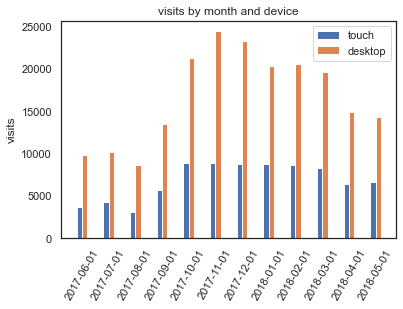

In [96]:
# group visit by month and plot it in graph  for MAU : 
visits['month'] = visits['Start Ts'].astype('datetime64[M]')
visits_by_month_touch = visits.query('Device == "touch"').groupby('month')['Uid'].nunique().reset_index()
visits_by_month_touch.columns = ['month', 'touch_visits']
visits_by_month_desktop = visits.query('Device == "desktop"').groupby('month')['Uid'].nunique().reset_index()
visits_by_month_desktop.columns = ['month', 'desktop_visits']
visits_by_month = pd.merge(visits_by_month_touch, visits_by_month_desktop, on='month', how ='outer')
print(visits_by_month)

x = np.arange(len(visits_by_month['month']))
width = 0.2
%matplotlib inline
fig, ax_month = plt.subplots()
rects1 = ax_month.bar(x - width/2, visits_by_month['touch_visits'], width,  label = 'touch')
rects2 = ax_month.bar(x + width/2, visits_by_month['desktop_visits'], width, label='desktop')
ax_month.set_ylabel('visits')
ax_month.set_xticks(x, visits_by_month['month'].astype('string'), rotation =60)
ax_month.set_title('visits by month and device')
ax_month.legend()
fig.show()


This graph gives us a better view of the monthly visits distribution. From October 17 until February 18 it showed more than 20K visits on the desktop device and more the 8K visits on the touch device. 

#### visits by week 

In [97]:
# group visit by week and plot a graph for WAU:
visits['week'] = visits['Start Ts'].astype('datetime64[W]')
visits_by_week_touch = visits.query('Device == "touch"').groupby('week')['Uid'].nunique().reset_index()
visits_by_week_touch.columns = ['week', 'touch_visits']
visits_by_week_desktop = visits.query('Device == "desktop"').groupby('week')['Uid'].nunique().reset_index()
visits_by_week_desktop.columns = ['week', 'desktop_visits']
visits_by_week = pd.merge(visits_by_week_touch, visits_by_week_desktop, on='week', how ='outer')

print('visits by week')
print(visits_by_week.head(5))


visits by week
        week  touch_visits  desktop_visits
0 2017-06-01          1110            3015
1 2017-06-08           899            2431
2 2017-06-15           693            2168
3 2017-06-22           868            2231
4 2017-06-29           847            2233


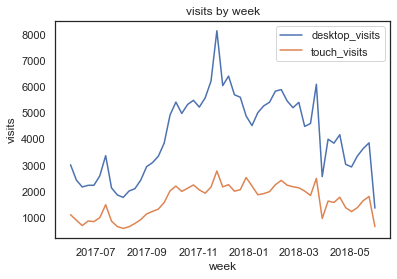

In [98]:
%matplotlib inline
plt.plot(visits_by_week['week'],visits_by_week['desktop_visits'], label = 'desktop_visits')
plt.plot(visits_by_week['week'],visits_by_week['touch_visits'], label = 'touch_visits')
plt.title('visits by week')
plt.xlabel('week')
plt.ylabel('visits')
plt.legend()
plt.show()

There is big peak around the end of November (black Friday), and around April. We see that desktop visits are much higher.

In [99]:
# group distinct user visits by day and plot a graph for DAU:
visits['day'] = visits['Start Ts'].astype('datetime64[D]')
visits_by_day_touch = visits.query('Device == "touch"').groupby('day')['Uid'].nunique().reset_index()
visits_by_day_touch.columns = ['day', 'touch_visits']
visits_by_day_desktop = visits.query('Device == "desktop"').groupby('day')['Uid'].nunique().reset_index()
visits_by_day_desktop.columns = ['day', 'desktop_visits']
dis_visits_by_day = pd.merge(visits_by_day_touch, visits_by_day_desktop, on='day', how ='outer')

print('visits by day')
print(dis_visits_by_day.tail(5))

visits by day
           day  touch_visits  desktop_visits
359 2018-05-28         303.0             738
360 2018-05-29         263.0             690
361 2018-05-30         393.0             904
362 2018-05-31         655.0            1361
363 2018-03-31           NaN               1


In [100]:
dis_visits_by_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   day             364 non-null    datetime64[ns]
 1   touch_visits    363 non-null    float64       
 2   desktop_visits  364 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.4 KB


There are missing values on touch visits I'll fill it with zeros.

In [101]:
dis_visits_by_day.fillna(0)

,day,touch_visits,desktop_visits
0,2017-06-01,153.0,455
1,2017-06-02,152.0,458
2,2017-06-03,139.0,307
3,2017-06-04,153.0,326
4,2017-06-05,195.0,631
...,...,...,...
359,2018-05-28,303.0,738
360,2018-05-29,263.0,690
361,2018-05-30,393.0,904
362,2018-05-31,655.0,1361


#### visits by day:

In [102]:
# We need to sort the value, so the data would  be arranged on the graph:
dis_visits_by_day=dis_visits_by_day.sort_values(by ='day',ascending =True)

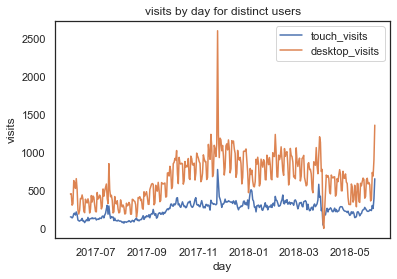

In [103]:
%matplotlib inline
plt.plot(dis_visits_by_day['day'],dis_visits_by_day['touch_visits'], label = 'touch_visits')
plt.plot(dis_visits_by_day['day'],dis_visits_by_day['desktop_visits'], label = 'desktop_visits')
plt.title('visits by day for distinct users')
plt.xlabel('day')
plt.ylabel('visits')
plt.legend()
plt.show()

The data is consistent, we see the same general behavior.
Notice the vibrations, there are a lot of small peaks.
Probably because shows were scheduled around those days causing small peaks.  

In [104]:
# I want to see which days have the most visits:
dis_visits_by_day[dis_visits_by_day['desktop_visits']>2000]

,day,touch_visits,desktop_visits
176,2017-11-24,777.0,2605


* The highst pike is on black Friday.

#### sticky factors:

In [105]:
# lets calculate sticky factor:

MAU_touch = visits_by_month['touch_visits'].mean()
MAU_desktop = visits_by_month['desktop_visits'].mean()
print('MAU for touch device:', MAU_touch)
print('MAU for desktop device:', MAU_desktop)
print()
WAU_touch = visits_by_week['touch_visits'].mean()
WAU_desktop = visits_by_week['desktop_visits'].mean()
print('WAU for touch device:', WAU_touch)
print('WAU for desktop device:', WAU_desktop)
print()
DAU_touch = dis_visits_by_day['touch_visits'].mean()
DAU_desktop = dis_visits_by_day['desktop_visits'].mean()
print('DAU for touch device:', DAU_touch)
print('DAU for desktop device:', DAU_desktop)

MAU for touch device: 6825.916666666667
MAU for desktop device: 16724.916666666668

WAU for touch device: 1637.2641509433963
WAU for desktop device: 4135.754716981132

DAU for touch device: 252.8732782369146
DAU for desktop device: 659.2445054945055


In [106]:
print('sticky factor DAU/WAU for touch device:', 100*DAU_touch/WAU_touch)
print('sticky factor DAU/WAU for desktop device:', 100*DAU_desktop/WAU_desktop)
print()
print('sticky factor DAU/MAU for touch device:', 100*DAU_touch/MAU_touch)
print('sticky factor DAU/MAU for desktop device:', 100*DAU_desktop/MAU_desktop)

sticky factor DAU/WAU for touch device: 15.44486746938228
sticky factor DAU/WAU for desktop device: 15.940125820027275

sticky factor DAU/MAU for touch device: 3.704605411779828
sticky factor DAU/MAU for desktop device: 3.941690823538764


* Generally, these metrics suppose to increase steadily, so they play an important role in team motivation. For that reason, those metrics are sometimes called vanity metrics. 
* Here we are not seeing steady increases.  The daily visits number stays around 500 visits for desktop and 250 for touch.

In [107]:
# How many sessions are there per day: 
visits_by_day_touch = visits.query('Device == "touch"').groupby('day').agg({'Uid':['count','nunique']})
visits_by_day_touch = visits_by_day_touch.reset_index()
visits_by_day_touch.columns = ['day', 'touch_visits', 'touch_unique_visits']
visits_by_day_touch['avg_touch'] = visits_by_day_touch['touch_visits']/visits_by_day_touch['touch_unique_visits']

visits_by_day_desk = visits.query('Device == "desktop"').groupby('day').agg({'Uid':['count','nunique']})
visits_by_day_desk = visits_by_day_desk.reset_index()
visits_by_day_desk.columns = ['day', 'desk_visits', 'desk_unique_visits']
visits_by_day_desk['avg_desk'] = visits_by_day_desk['desk_visits']/visits_by_day_desk['desk_unique_visits']

visits_by_day = pd.merge(visits_by_day_touch, visits_by_day_desk, on='day', how ='outer')
visits_by_day=visits_by_day.sort_values(by ='day',ascending =True)
visits_by_day.head(4)

,day,touch_visits,touch_unique_visits,avg_touch,desk_visits,desk_unique_visits,avg_desk
0,2017-06-01,163.0,153.0,1.065359,501,455,1.101099
1,2017-06-02,160.0,152.0,1.052632,498,458,1.087336
2,2017-06-03,148.0,139.0,1.064748,329,307,1.071661
3,2017-06-04,161.0,153.0,1.052288,349,326,1.070552


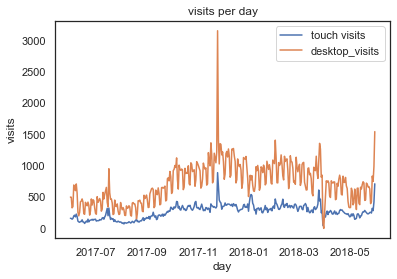

In [108]:
plt.plot(visits_by_day['day'],visits_by_day['touch_visits'], label = 'touch visits')
plt.plot(visits_by_day['day'],visits_by_day['desk_visits'], label = 'desktop_visits')
plt.title('visits per day')
plt.xlabel('day')
plt.ylabel('visits')
plt.legend()
plt.show()

The graph above looks a lot like the 'visits per day for distinct users' graph.

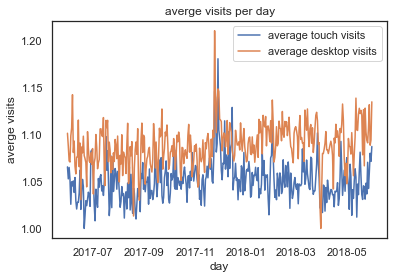

In [109]:
plt.plot(visits_by_day['day'],visits_by_day['avg_touch'], label = 'average touch visits')
plt.plot(visits_by_day['day'],visits_by_day['avg_desk'], label = 'average desktop visits')
plt.title('averge visits per day')
plt.xlabel('day')
plt.ylabel('averge visits')
plt.legend()
plt.show()

The average visit is around 1.1 for desktops and 1.05 for a touch devices. 

#### Session length:

In [110]:
# Add a length of session column:
visits['ses_length'] = (visits['End Ts'] - visits['Start Ts'])/ np.timedelta64(1, 'm')
print('minimum session length:', visits['ses_length'].min())
print('maximum session length:', visits['ses_length'].max())
print('median session length:', visits['ses_length'].median())
print('most common session length:', visits['ses_length'].mode())

visits[visits['ses_length']< 0]

minimum session length: -46.0
maximum session length: 711.0
median session length: 5.0
most common session length: 0    1.0
dtype: float64


,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,day,ses_length
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,2018-03-01,2018-03-22,2018-03-25,-32.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,2018-03-01,2018-03-22,2018-03-25,-46.0


* As we can see there's a negative session length on users 4181 and 177972 its probably a mistake in the logs, I'm going to change those values to zeros. 

In [111]:
visits.loc[visits['ses_length']<0, 'ses_length']=0

In [112]:
sess_len_touch = visits.query('Device == "touch"').groupby('week')['ses_length'].median().reset_index()
sess_len_touch.columns = ['day', 'ses_length_touch']
sess_len_desktop = visits.query('Device == "desktop"').groupby('week')['ses_length'].median().reset_index()
sess_len_desktop.columns = ['day', 'ses_length_desktop']
sess_len = pd.merge(sess_len_touch, sess_len_desktop, on='day', how ='outer')
sess_len=sess_len.sort_values(by ='day',ascending =True)
print(sess_len.head(3))

         day  ses_length_touch  ses_length_desktop
0 2017-06-01               4.0                 6.0
1 2017-06-08               3.0                 5.0
2 2017-06-15               3.0                 5.0


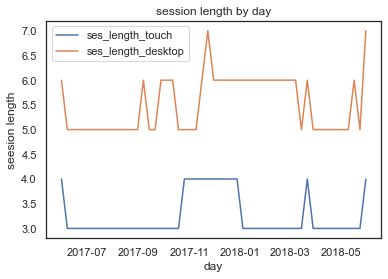

In [113]:
plt.plot(sess_len['day'],sess_len['ses_length_touch'], label = 'ses_length_touch')
plt.plot(sess_len['day'],sess_len['ses_length_desktop'], label = 'ses_length_desktop')
plt.title('session length by day')
plt.xlabel('day')
plt.ylabel('seesion length')
plt.legend()
plt.show()

* The most common session length both for desktop and touch devices is 1 minute. 
* From the graph above we can see:
    * The session length and number of visits increase around December.
    *  Session length on desktop devices is higher. 

#### Retention:

In [114]:
# lets see how often users come back by creating heat map:

first_activity_date = visits.groupby(['Uid'])['Start Ts'].min()
first_activity_date.name = 'first_activity_date'
user_activity = visits.join(first_activity_date, on='Uid')

user_activity['first_activity_month'] = user_activity['first_activity_date'].astype('datetime64[M]')

# find the number of month between the first visit to the next:
user_activity['cohort_lifetime']=((user_activity['month']-user_activity['first_activity_month'])/np.timedelta64(1, 'M')).round().astype(int)

# create a table with the diffrnt cohort:
pivot = pd.pivot_table(user_activity, 
                       index ='first_activity_month', 
                       columns = 'cohort_lifetime', 
                       values = 'Uid', aggfunc = 
                       'nunique').reset_index()
pivot.fillna(' ')


cohort_lifetime,first_activity_month,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
1,2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2,2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
3,2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
4,2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
5,2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
6,2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
7,2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
8,2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,
9,2018-03-01,20589.0,861.0,557.0,,,,,,,,,


In [115]:
user_activity.head(3)

,Device,End Ts,Source Id,Start Ts,Uid,year,month,week,day,ses_length,first_activity_date,first_activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,18.0,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,28.0,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00,2017-07-01,0


In [116]:
retention = pivot
#find the retention rate: 
retention.loc[:,0:11] = retention.loc[:, 0:11].div(retention.loc[:,0], axis = 0)
retention.index = retention['first_activity_month']
retention.fillna('')
retention.index=retention.index.astype(str)

<AxesSubplot:title={'center':'Retention Rate'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

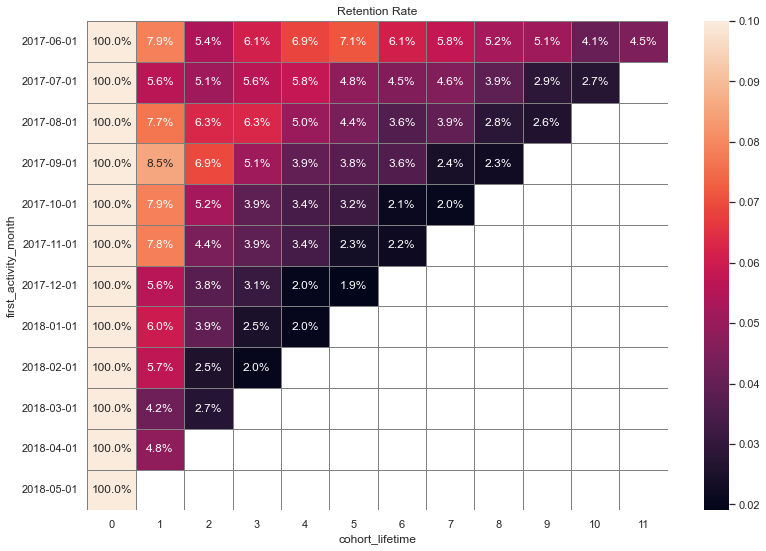

In [117]:
#create a hit map:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(retention.loc[:,0:11],vmax= 0.1, annot=True, fmt='.1%', linewidths=1, linecolor='grey')

* By the heat map above we can see:
    * That June, August, September, October, and November are the best cohorts in the heat map. Those months have the best retention rate.
    * September is the month with the highest retention rate.
However user visits the website less and less, we should find the reason for that and try and fix it. 

### Sales

In [118]:
# To find out how many unique users are in orders table: 
orders['Uid'].value_counts()

3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
1039442909910620438       1
42362552951081637         1
8069118931487899422       1
17649287249444736221      1
83872787173869366         1
Name: Uid, Length: 36523, dtype: int64

In [119]:
# We have the first activity date for visits table, lets find the first activity date for purchases:
first_pur_date = orders.groupby('Uid')['Buy Ts'].min()
first_pur_date.name ='first_pur_date'

# I use merge on left beacaus I look for users who start buying:
start_buy = pd.merge(first_activity_date, first_pur_date, on ='Uid', how = 'right').reset_index()
start_buy['days_until_buying'] = start_buy['first_pur_date']- start_buy['first_activity_date']
start_buy.head(4)

,Uid,first_activity_date,first_pur_date,days_until_buying
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00


In [120]:
# To make sure all the unique users are in the table:
start_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Uid                  36523 non-null  uint64         
 1   first_activity_date  36523 non-null  datetime64[ns] 
 2   first_pur_date       36523 non-null  datetime64[ns] 
 3   days_until_buying    36523 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1), uint64(1)
memory usage: 1.1 MB


In [121]:
print('minimum time passed from a visit to buying:', start_buy['days_until_buying'].min())
print()
print('maximum time passed from a visit to buying:', start_buy['days_until_buying'].max())
print()
print('most common time passed from a visit to buying:', start_buy['days_until_buying'].mode())
print()

minimum time passed from a visit to buying: 0 days 00:00:00

maximum time passed from a visit to buying: 363 days 07:04:00

most common time passed from a visit to buying: 0   0 days 00:01:00
dtype: timedelta64[ns]



* The minimum time that passes from entering the website until a person starts buying is 0.
* Some people entering the website by clicking on ads and start buying immediately.
* Most common users spend 1 minute between entering and buying.
* Ther's maximum time spent was 363 days, 7 hours, and 4 minutes, it's probably a mistake.

In [122]:
# How many orders do customers make during a given piriod of time:
# First find the order month:
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders.head()

,Buy Ts,Revenue,Uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [123]:
# Find the first purchase date:
first_pur_date = first_pur_date.reset_index()
first_pur_date.columns = ['Uid', 'first_pur_date']
first_pur_date

,Uid,first_pur_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [124]:
# Show how many orders do people make during a given date : 
first_pur_date['first_pur_month']= first_pur_date['first_pur_date'].astype('datetime64[M]')
temp = orders.merge(first_pur_date[['Uid','first_pur_month']], on = 'Uid', how = 'left')
cohort_size = temp.groupby('first_pur_month').agg({'Uid':['nunique','count']}).reset_index()
cohort_size.columns= ['first_pur_month', 'n_buyers', 'n_orders']
cohort_size.head(5)


,first_pur_month,n_buyers,n_orders
0,2017-06-01,2023,4438
1,2017-07-01,1923,2910
2,2017-08-01,1370,2188
3,2017-09-01,2581,3878
4,2017-10-01,4340,6005


In [125]:
# Group orders by first purchase month and order month,summerize the reveniew for each cohort:
cohorts = temp.groupby(['first_pur_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()
cohorts.head(3)

,first_pur_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34


In [126]:
# Adding each cohort the number of different users and number of orders, changing the table name to 'report':
report = pd.merge(cohort_size, cohorts, on ='first_pur_month')
report.head(3)

,first_pur_month,n_buyers,n_orders,order_month,Revenue
0,2017-06-01,2023,4438,2017-06-01,9557.49
1,2017-06-01,2023,4438,2017-07-01,981.82
2,2017-06-01,2023,4438,2017-08-01,885.34


In [127]:
# Calculate the cohort age:
report['cohort_age'] = ((report['order_month']-report['first_pur_month'])/np.timedelta64(1, 'M')).round().astype(int)
report.head(4)

,first_pur_month,n_buyers,n_orders,order_month,Revenue,cohort_age
0,2017-06-01,2023,4438,2017-06-01,9557.49,0
1,2017-06-01,2023,4438,2017-07-01,981.82,1
2,2017-06-01,2023,4438,2017-08-01,885.34,2
3,2017-06-01,2023,4438,2017-09-01,1931.30,3


In [128]:
# Calculate orders per user, avg purchase size, and LTV(Lifetime Value):
report['orders_per_user'] = report['n_orders']/report['n_buyers']
report['avg_purchase_size'] = report['Revenue']/ report['n_orders']
report['ltv'] = report['Revenue']/ report['n_buyers']
report.head(4)

,first_pur_month,n_buyers,n_orders,order_month,Revenue,cohort_age,orders_per_user,avg_purchase_size,ltv
0,2017-06-01,2023,4438,2017-06-01,9557.49,0,2.193772,2.153558,4.724414
1,2017-06-01,2023,4438,2017-07-01,981.82,1,2.193772,0.221230,0.485329
2,2017-06-01,2023,4438,2017-08-01,885.34,2,2.193772,0.199491,0.437637
3,2017-06-01,2023,4438,2017-09-01,1931.30,3,2.193772,0.435174,0.954671


In [129]:
# Table that summerize how many orders people made for every cohort:
piv_order_per_time = report.pivot_table(
    index = 'first_pur_month',
    columns = 'cohort_age',
    values = 'orders_per_user',
    aggfunc = 'sum').cumsum(axis=1)
piv_order_per_time.round(2).fillna(' ')

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_pur_month,,,,,,,,,,,,
2017-06-01,2.19,4.39,6.58,8.78,10.97,13.16,15.36,17.55,19.74,21.94,24.13,26.33
2017-07-01,1.51,3.03,4.54,6.05,7.57,9.08,10.59,12.11,13.62,15.13,16.65,
2017-08-01,1.60,3.19,4.79,6.39,7.99,9.58,11.18,12.78,14.37,15.97,,
2017-09-01,1.50,3.01,4.51,6.01,7.51,9.02,10.52,12.02,13.52,,,
2017-10-01,1.38,2.77,4.15,5.53,6.92,8.3,9.69,11.07,,,,
2017-11-01,1.45,2.89,4.34,5.78,7.23,8.67,10.12,,,,,
2017-12-01,1.34,2.69,4.03,5.38,6.72,8.07,,,,,,
2018-01-01,1.28,2.55,3.83,5.11,6.39,,,,,,,
2018-02-01,1.22,2.45,3.67,4.9,,,,,,,,


By the table above:
* People make 1.5 purchases a month.
* June is the month with the highest number of orders per cohort, around 2.19. Maybe it's because it's summer and there were more shows. 
* July, August, and September are the months with the highest number of orders per cohort.
* After June people make 1.5-1.6 purchases for a cohort. 

#### Average purchase size

In [130]:
# Caculate average purchase size by table- order_by_users1: 
pivot_pur_size = report.pivot_table(
    index ='first_pur_month', 
    columns = 'cohort_age', 
    values = 'avg_purchase_size', 
    aggfunc = 'mean')
pivot_pur_size.index=pivot_pur_size.index.astype(str)
pivot_pur_size.round(2).fillna(' ')


cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_pur_month,,,,,,,,,,,,
2017-06-01,2.15,0.22,0.2,0.44,0.47,0.34,0.43,0.27,0.25,0.28,0.26,0.12
2017-07-01,3.97,0.22,0.41,0.24,0.12,0.1,0.08,0.09,0.11,0.1,0.1,
2017-08-01,3.30,0.3,0.29,0.24,0.31,0.18,0.13,0.25,0.18,0.12,,
2017-09-01,3.76,0.74,0.35,2.65,0.27,0.43,0.47,0.16,0.12,,,
2017-10-01,3.62,0.39,0.14,0.11,0.11,0.09,0.06,0.08,,,,
2017-11-01,3.57,0.28,0.14,0.22,0.1,0.04,0.08,,,,,
2017-12-01,3.52,0.19,0.69,0.79,0.23,0.25,,,,,,
2018-01-01,3.24,0.23,0.24,0.11,0.05,,,,,,,
2018-02-01,3.40,0.23,0.06,0.06,,,,,,,,


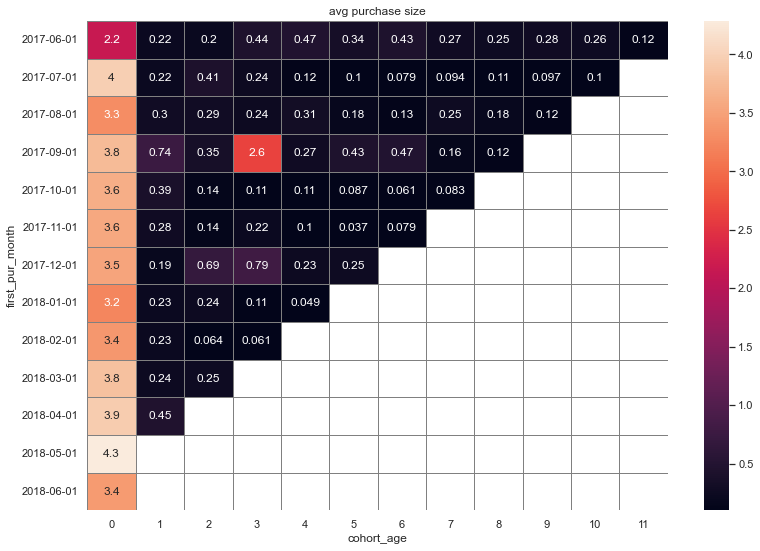

In [131]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('avg purchase size')
sns.heatmap(pivot_pur_size,vmin =0.1 ,annot=True, linewidths=1, linecolor='grey')
plt.show()

* The average purchase size moves from 2.2 -4.3  and decreases with time, we need to figure out why its happened.

#### LTV: 

In [132]:
pivot_ltv = report.pivot_table(
    index='first_pur_month',
    columns='cohort_age',
    values='ltv',
    aggfunc='mean').round(2)
pivot_ltv.index=pivot_ltv.index.astype(str)
pivot_ltv.fillna('')

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_pur_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


<AxesSubplot:title={'center':'LTV'}, xlabel='cohort_age', ylabel='first_pur_month'>

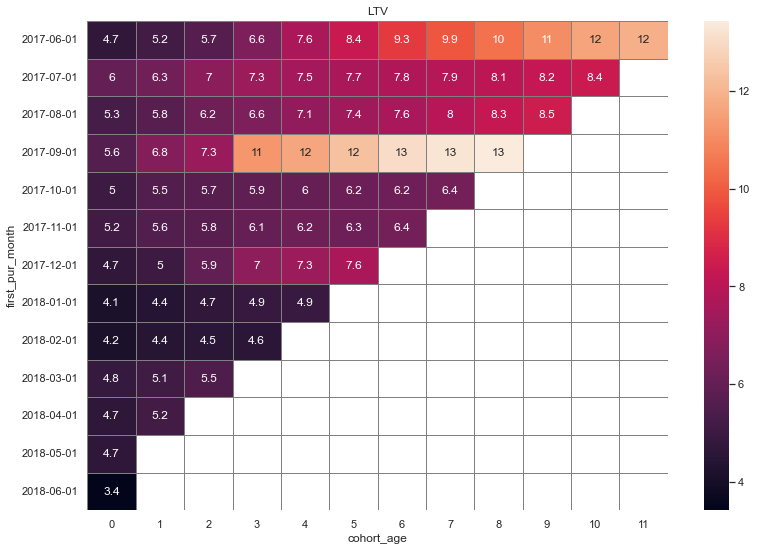

In [133]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(pivot_ltv.cumsum(axis=1), annot=True, linewidths=1, linecolor='grey')

* People buy more and spend more money in July (LTV of 6).
* For September  until December  LTV value stays around 5.
* There are no detailed data on the expenses, I'm assuming the Gross-Profit = Revenue

<AxesSubplot:title={'center':'LTV'}, xlabel='cohort_age', ylabel='first_pur_month'>

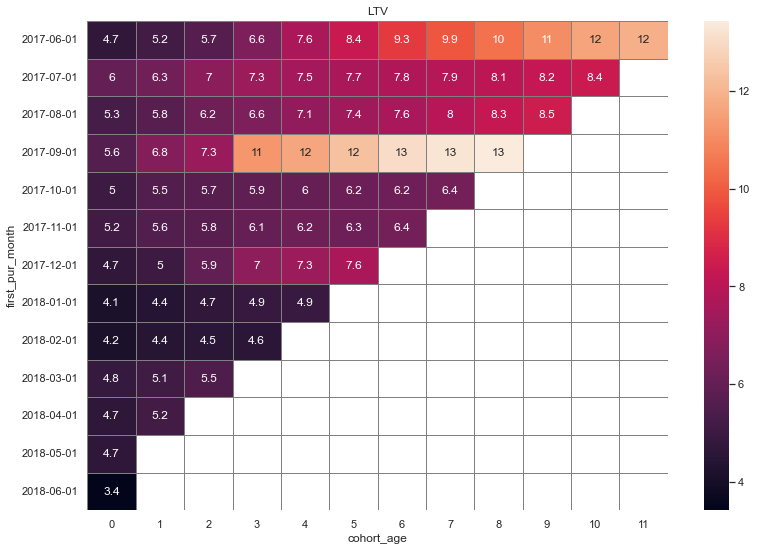

In [134]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(pivot_ltv.cumsum(axis=1),  annot=True, linewidths=1, linecolor='grey')

### Mid conclusion: 
* The minimum time that passes from entering the website until a person starts buying is 0.
* Most common users spend 1 minute between entering and start buying.
* Ther's maximum time spent was 363 days, 7 hours, and 4 minutes, it's probably a mistake.

* People make 1.5 purchases a month.
* June is the month with the highest number of orders per cohort, around 2.19.
  
* The average purchase size moves from 2.2 -4.9  and decreases with time, we need to figure out the cause.

* People buy more and spend more money in July and September, with an LTV value of 6 that stays around 5 until December,
* There are no  detailed data on the expenses, I'm assumong the gross profit= Revenue

### Marketing:

In [135]:
costs['dt'].describe()

count                    2542
unique                    364
top       2017-06-01 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [136]:
orders['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: Buy Ts, dtype: object

* The date range on the 'order' table and on the 'costs' table differs in a day. It's not that dramatic

In [137]:
print(costs['source_id'].value_counts())
costs.head(4)

5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: source_id, dtype: int64


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00


#### CAC(Customer Acquisition Cost) by source:

In [138]:
# how much did customer acquisition from each of the source costs:
# First the monthly costs:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs= costs.groupby(['source_id','month'])['costs'].sum().reset_index()
monthly_costs.columns = ['cost_source_id', 'month', 'monthly_costs']
monthly_costs


,cost_source_id,month,monthly_costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [139]:
costs_1 = monthly_costs.query('cost_source_id == 1')
costs_2 = monthly_costs.query('cost_source_id == 2')
costs_3 = monthly_costs.query('cost_source_id == 3')
costs_4 = monthly_costs.query('cost_source_id == 4')
costs_5 = monthly_costs.query('cost_source_id == 5')
costs_9 = monthly_costs.query('cost_source_id == 9')
costs_10 = monthly_costs.query('cost_source_id == 10')

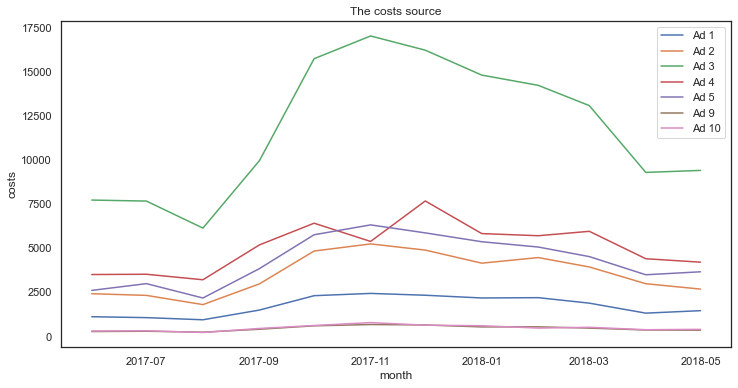

In [140]:
plt.figure(figsize=(12,6))
plt.plot(costs_1['month'],costs_1['monthly_costs'], label = 'Ad 1')
plt.plot(costs_2['month'],costs_2['monthly_costs'], label = 'Ad 2')
plt.plot(costs_3['month'],costs_3['monthly_costs'], label = 'Ad 3')
plt.plot(costs_4['month'],costs_4['monthly_costs'], label = 'Ad 4')
plt.plot(costs_5['month'],costs_5['monthly_costs'], label = 'Ad 5')
plt.plot(costs_9['month'],costs_9['monthly_costs'], label = 'Ad 9')
plt.plot(costs_10['month'],costs_10['monthly_costs'], label = 'Ad 10')
plt.title('The costs source')
plt.xlabel('month')
plt.ylabel('costs')
plt.legend()

plt.show()

By the graphs above:
* source_id 1, 2, 9, and 10 have the lowest costs.
* source_id  10 and 9 are almost the same.
* source_id 3, 4, and 5 have the highest costs.
* There is a peak in November, and we know from before that its a month with high revenue,
* It seems that source 3 has the highest cost, and source 4 is the most diverse. 
    

In [141]:
monthly_total_costs= costs.groupby('month')['costs'].sum().reset_index()
monthly_total_costs.columns = ['month', 'monthly_costs']
monthly_total_costs

,month,monthly_costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


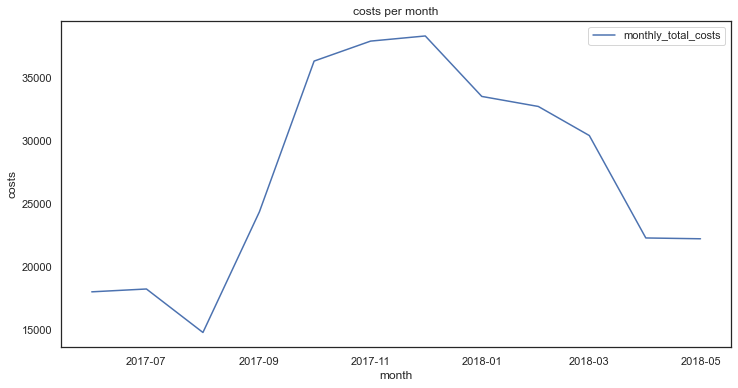

In [142]:
plt.figure(figsize=(12,6))
plt.plot(monthly_total_costs['month'],monthly_total_costs['monthly_costs'], label = 'monthly_total_costs')
plt.title('costs per month')
plt.xlabel('month')
plt.ylabel('costs')
plt.legend()
plt.figsize=(16,9)
plt.show()

* As the graph shows in December the cost is the highest, its make sense that around Christmas the cost would be higher. 

#### CAC by month: 

In [143]:
# Calculate customer aquisition cost (cac) per month:
# Earlier we found the cohort size that shows how many buyer the website had for every first month,
# I'll merge this table with the grouped cost_by_month table: 
cohort_size.columns = ['month', 'n_buyers', 'n_orders']
cohort_size.head(4)

,month,n_buyers,n_orders
0,2017-06-01,2023,4438
1,2017-07-01,1923,2910
2,2017-08-01,1370,2188
3,2017-09-01,2581,3878


In [144]:
cac = pd.merge(cohort_size, monthly_total_costs, how = 'left', on = 'month')
cac['cac'] = cac['monthly_costs']/cac['n_buyers']
cac

,month,n_buyers,n_orders,monthly_costs,cac
0,2017-06-01,2023,4438,18015.00,8.905091
1,2017-07-01,1923,2910,18240.59,9.485486
2,2017-08-01,1370,2188,14790.54,10.796015
3,2017-09-01,2581,3878,24368.91,9.441654
4,2017-10-01,4340,6005,36322.88,8.369327
5,2017-11-01,4081,5900,37907.88,9.288870
6,2017-12-01,4383,5894,38315.35,8.741809
7,2018-01-01,3373,4308,33518.52,9.937302
8,2018-02-01,3651,4470,32723.03,8.962758
9,2018-03-01,3533,4484,30415.27,8.608907


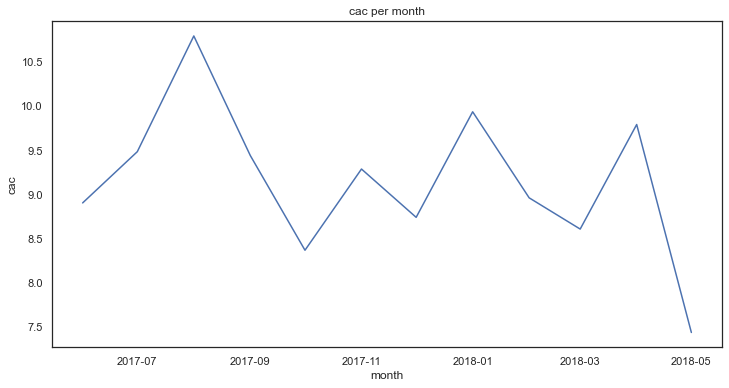

In [145]:
plt.figure(figsize=(12,6))
plt.plot(cac['month'],cac['cac'])
plt.title('cac per month')
plt.xlabel('month')
plt.ylabel('cac')
plt.show()

* The CAC ranges from 7.5 at the end of May 2018 to 10.5 in July 2017. 

#### CAC by month and source:

In [146]:
# Find CAC per source: 
# First lets look at visits table:
visits.groupby(['Uid'])['Source Id'].nunique().head()

Uid
11863502262781     1
49537067089222     1
297729379853735    1
313578113262317    1
325320750514679    1
Name: Source Id, dtype: int64

In [147]:
# Find the first source for every user:
first_source = visits.sort_values('day').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns=['Uid','first_source']
first_source.head()

,Uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [148]:
tmp = orders.copy().merge(first_pur_date[['Uid','first_pur_month']], on = 'Uid', how = 'left')

In [149]:
# Merge first user source with data about first purchases:
purchase=tmp.merge(first_source,on=['Uid'],how='left')
purchase.head()

,Buy Ts,Revenue,Uid,order_month,first_pur_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3


In [150]:
# Find cost for month and source id:
marketing_by_month_source=costs.groupby(['month','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.columns = ['cost_month', 'source', 'costs']
marketing_by_month_source.head()

,cost_month,source,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [151]:
# Find number of buyers for each source for every month:
buyers_per_moth_source=purchase.groupby(['first_pur_month','first_source'])['Uid'].nunique().reset_index()
buyers_per_moth_source.columns=['cost_month','source','buyers']
buyers_per_moth_source.head()

,cost_month,source,buyers
0,2017-06-01,1,213
1,2017-06-01,2,241
2,2017-06-01,3,616
3,2017-06-01,4,405
4,2017-06-01,5,389


In [152]:
# Actual CAC calculations:
CAC_per_month_source = marketing_by_month_source.merge(buyers_per_moth_source,how='left',on=['cost_month','source'])
CAC_per_month_source['CAC']=CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source

,cost_month,source,costs,buyers,CAC
0,2017-06-01,1,1125.61,213,5.284554
1,2017-06-01,2,2427.38,241,10.072116
2,2017-06-01,3,7731.65,616,12.551380
3,2017-06-01,4,3514.80,405,8.678519
4,2017-06-01,5,2616.12,389,6.725244
...,...,...,...,...,...
79,2018-05-01,3,9411.42,824,11.421626
80,2018-05-01,4,4214.21,778,5.416722
81,2018-05-01,5,3669.56,514,7.139222
82,2018-05-01,9,362.17,59,6.138475


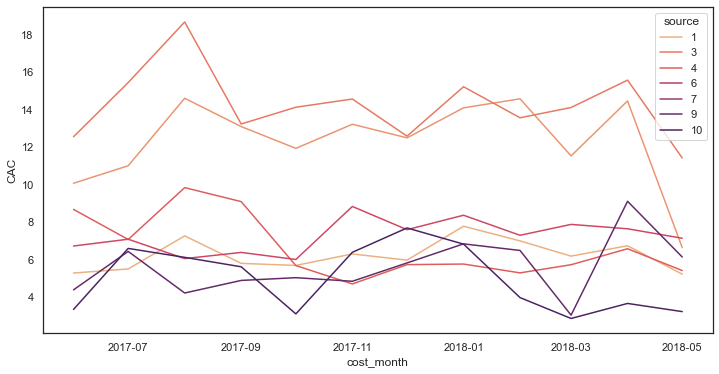

In [153]:
# Plotting CAC dynamics:
plt.figure(figsize=(12,6))
sns.lineplot(data=CAC_per_month_source, x="cost_month", y="CAC", hue="source",  palette="flare")
plt.show()

In [154]:
cac_1 = CAC_per_month_source.query('source == 1')
cac_2 = CAC_per_month_source.query('source == 2')
cac_3 = CAC_per_month_source.query('source == 3')
cac_4 = CAC_per_month_source.query('source == 4')
cac_5 = CAC_per_month_source.query('source == 5')
cac_9 = CAC_per_month_source.query('source == 9')
cac_10 = CAC_per_month_source.query('source == 10')


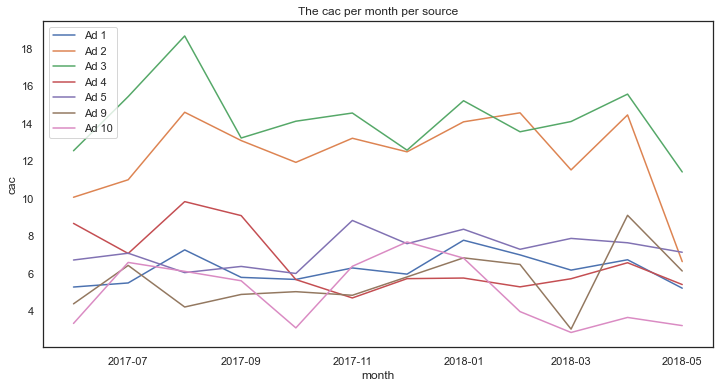

In [156]:
plt.figure(figsize=(12,6))
plt.plot(cac_1['cost_month'],cac_1['CAC'], label = 'Ad 1')
plt.plot(cac_2['cost_month'],cac_2['CAC'], label = 'Ad 2')
plt.plot(cac_3['cost_month'],cac_3['CAC'], label = 'Ad 3')
plt.plot(cac_4['cost_month'],cac_4['CAC'], label = 'Ad 4')
plt.plot(cac_5['cost_month'],cac_5['CAC'], label = 'Ad 5')
plt.plot(cac_9['cost_month'],cac_9['CAC'], label = 'Ad 9')
plt.plot(cac_10['cost_month'],cac_10['CAC'], label = 'Ad 10')
plt.title('The cac per month per source')
plt.xlabel('month')
plt.ylabel('cac')
plt.legend(loc ='upper left')
plt.show()

* The trend from the earlier graph of cost per source is kept the same. It shows that as ads 1, 4,5,9, and 10  costs are all between 4-9, ads 2 and 3 have higher costs that range between 10-18. 

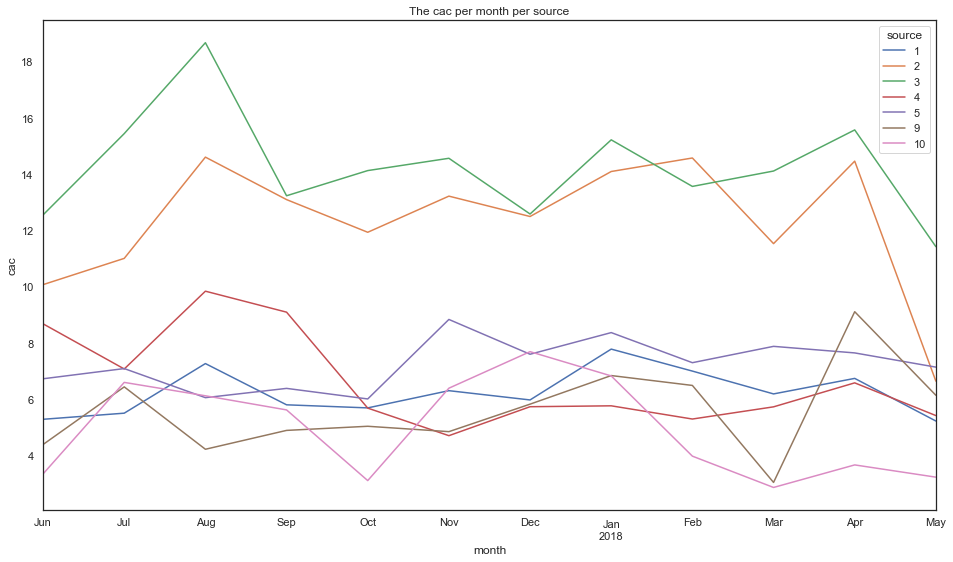

In [157]:
CAC_per_month_source.pivot_table(index=['cost_month'], columns='source', values='CAC', aggfunc='mean').plot(
    figsize=(16,9), title='The cac per month per source', xlabel = 'month', ylabel = 'cac')
plt.show()

#### Return of  investment (ROMI):

In [158]:
# Find the ROMI return of marketing investment:
for_romi= report[['first_pur_month', 'cohort_age', 'ltv']]
for_romi.columns = ['month', 'age', 'ltv']
for_romi = pd.merge(for_romi, cac, on = 'month', how ='left')
for_romi.head(3)


,month,age,ltv,n_buyers,n_orders,monthly_costs,cac
0,2017-06-01,0,4.724414,2023,4438,18015.0,8.905091
1,2017-06-01,1,0.485329,2023,4438,18015.0,8.905091
2,2017-06-01,2,0.437637,2023,4438,18015.0,8.905091


In [159]:
# Calculate ROMI:
for_romi['romi'] = for_romi['ltv']/for_romi['cac']
for_romi.head(3)

,month,age,ltv,n_buyers,n_orders,monthly_costs,cac,romi
0,2017-06-01,0,4.724414,2023,4438,18015.0,8.905091,0.530530
1,2017-06-01,1,0.485329,2023,4438,18015.0,8.905091,0.054500
2,2017-06-01,2,0.437637,2023,4438,18015.0,8.905091,0.049145


In [160]:
romi_piv = for_romi.pivot_table(
    index='month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2) 

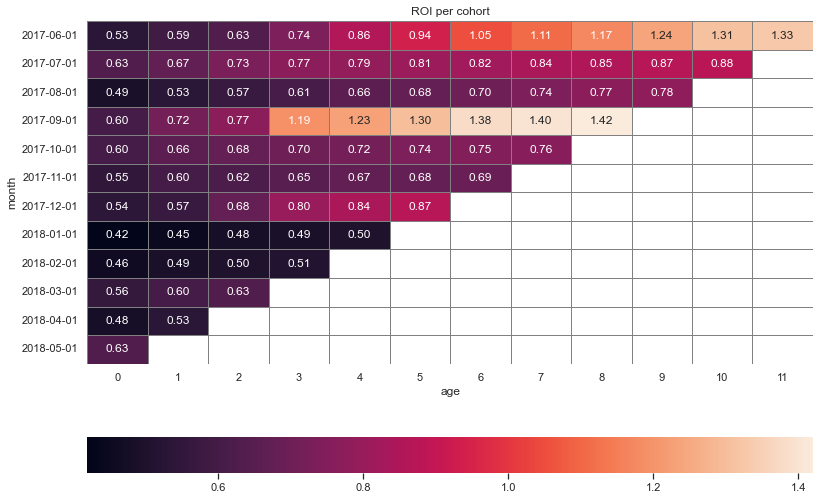

In [161]:
romi_piv.index=romi_piv.index.astype(str)
plt.figure(figsize=(13, 9))
sns.heatmap(romi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show()

The June cohort paid off at November,
and September cohort paid of at December, the rest of the cohort did not pay off. 

In [162]:
costs.head(3)

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01


In [163]:
# Find the ROMI - return of marketing investment:
marketing_per_source=costs.groupby(['source_id'])['costs'].sum().reset_index()
marketing_per_source.head()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


In [164]:
# Lets look at ROMI per source:
# First find ltv per source:
ltv_per_source=purchase.groupby(['first_source'])['Uid','Revenue'].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source.head(4)

,source_id,buyers,revenue,ltv
0,1,3365,34797.27,10.340942
1,2,3556,45335.95,12.749142
2,3,10137,51958.06,5.125585
3,4,9999,55387.40,5.539294


In [165]:
# merge the relevant data to calculate cac and romi:
roi_per_source= marketing_per_source.merge(ltv_per_source,on=['source_id'])
roi_per_source.head(3)

,source_id,costs,buyers,revenue,ltv
0,1,20833.27,3365,34797.27,10.340942
1,2,42806.04,3556,45335.95,12.749142
2,3,141321.63,10137,51958.06,5.125585


In [166]:
# Calculate CAC and ROMI: 
roi_per_source['cac']=roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

,source_id,costs,buyers,revenue,ltv,cac,romi
0,1,20833.27,3365,34797.27,10.340942,6.191165,1.670274
1,2,42806.04,3556,45335.95,12.749142,12.037694,1.059102
2,3,141321.63,10137,51958.06,5.125585,13.941169,0.367658
3,4,61073.60,9999,55387.40,5.539294,6.107971,0.906896
4,5,51757.10,7109,54442.14,7.658199,7.280504,1.051878
5,9,5517.49,1054,5538.50,5.254744,5.234810,1.003808
6,10,5822.49,1302,4596.66,3.530461,4.471959,0.789466


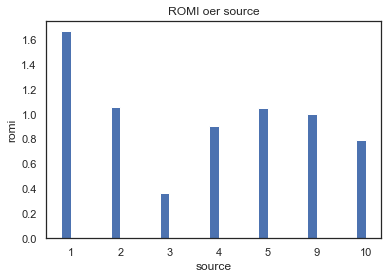

In [167]:
# plot a bar chart:
x = np.arange(len(roi_per_source['source_id']))
width = 0.2
fig, ax_year = plt.subplots()
rects1 = ax_year.bar(x - width/2, roi_per_source['romi'], width)
ax_year.set_ylabel('romi')
ax_year.set_xlabel('source')
ax_year.set_xticks(x, roi_per_source['source_id'])
ax_year.set_title('ROMI oer source')

plt.show()



Source 1, 2, 5, and 9 paid off,
source 3, 4 and 10 didn't paied off. 

## Conclusions: 
We have three data sets that represent visits, orders, and cost of yandex.Afisha -website for concerts and shows. 
At the beginning of the project, there are graphs for vanity metrics. On those graphs, there is no steady increase. The number of daily visits stays around 500 visits for desktops and 250 for touch devices. 
There is also a big pick on 2017-11-24, which is black Friday. 

In the second part of the project we study the retention rate, avg order, avg purchase size, and LTV calculation: 
The minimum time that passes from entering the website until user starts buying is 0. Most common users spend 1 minute between entering and buying. The maximum time spent is 363 days, 7 hours, and 4 minutes, it's probably a mistake.
users make 1.5 purchases a month. June is the month with the highest number of orders per cohort, around 2.19.
The average purchase size varies from 2.2 -4.9 and decreases with time, we need to figure out the reason.
Users buy more and spend more in July and September with an LTV value of 6. The LTV value stays around 5 until December. There is no detailed data on the expenses, so I'm assuming the Gross-profit= Revenue.


In the third part of the project, there are graphs that show the costs per month and per source:
* The CAC per month and per source,
* The ROMI per month per source. 

It shows that source id 1, 2, 9, and 10 have the lowest costs, 10 and 9 are almost the same.
Sources 3, 4, and 5 have the highest costs. There is a peak in November, we know from before that it's a month with high revenue. 
 It seems that source 3 has the highest cost, and source 4 is the most diverse.
As the graph shows in December the cost is the highest.
It makes sense that around Christmas the cost would be higher. 
The CAC ranges from 7.5 at the end of May 2018 to 10.5 in July 2017, where sources 1, 4,5,9, and 10 are all with CAC values between 4-9. Ads 2 and 3 have higher CAC that range between 10-18. 

The June cohort paid off in November,
and the September cohort paid of at December, the rest of the cohort did not pay off.
Sources 1, 2, 5, and 9 paid off
sources 3, 4, and 10 didn't pay off. 